In [1]:
import sys ,os
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)
    
import configparser
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import utils as Utils
from data_processing.data_processing_functions import *
from importlib import reload
reload(Utils)

config = configparser.ConfigParser()
config.read("../../config.ini")
pd.set_option('display.max_colwidth', None)

In [2]:
COVID_SEG_2_PATH = config['PATHS']['COVID_SEG_2_PATH']

COVID_SEG_2_TRAINIG_IMAGES_PATH = os.path.join(COVID_SEG_2_PATH, "rp_im")
COVID_SEG_2_TRAINING_INFECTION_MASKS_PATH = os.path.join(COVID_SEG_2_PATH, "rp_msk")
COVID_SEG_2_TRAINING_LUNG_MASKS_PATH = os.path.join(COVID_SEG_2_PATH, "rp_lung_msk")

In [3]:
covid_seg_2_metadata_df = read_covid_seg_2_folder_structure(COVID_SEG_2_PATH)
print(covid_seg_2_metadata_df.shape)
covid_seg_2_metadata_df.head()

(9, 4)


,id,image,infection_mask,lung_mask
0,1,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_im/1.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_msk/1.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_lung_msk/1.nii
1,2,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_im/2.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_msk/2.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_lung_msk/2.nii
2,3,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_im/3.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_msk/3.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_lung_msk/3.nii
3,4,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_im/4.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_msk/4.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_lung_msk/4.nii
4,5,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_im/5.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_msk/5.nii,/media/my_ftp/BasesDeDatos_Torax_RX_CT/COVID19_CT/COVID_SEG_2/rp_lung_msk/5.nii


In [4]:
ct_values_interval = []
for nii in range(covid_seg_2_metadata_df.shape[0]):
    id = nii + 1
    ct = Utils.read_nii(covid_seg_2_metadata_df.iloc[nii]["image"])
    ct_min = 0
    ct_max = 0
    for slice_index in range(ct.shape[2]):
        ct_slice = ct[:,:,slice_index]
        min = np.min(ct_slice)
        max = np.max(ct_slice)
        if min < ct_min:
            ct_min = min
        if max > ct_max:
            ct_max = max
    ct_values_interval.append((id, ct_min, ct_max))
ct_values_interval   

[(1, -1414.765380859375, 212.7372589111328),
 (2, -1353.9586181640625, 175.99066162109375),
 (3, -1334.57275390625, 136.52835083007812),
 (4, -1341.1151123046875, 158.76779174804688),
 (5, -1339.6790771484375, 156.22637939453125),
 (6, -1356.318603515625, 183.8311309814453),
 (7, -1353.9586181640625, 175.99066162109375),
 (8, -1151.7724609375, 230.734130859375),
 (9, -1217.1336669921875, 291.040771484375)]

In [5]:
id = 1
ct_sample = Utils.read_nii(covid_seg_2_metadata_df.iloc[id]["image"])
ct_sample_mask = Utils.read_nii(covid_seg_2_metadata_df.iloc[id]["infection_mask"])
ct_sample_lung_mask = Utils.read_nii(covid_seg_2_metadata_df.iloc[id]["lung_mask"])
print(ct_sample.shape)
print(ct_sample_mask.shape)
print(ct_sample_lung_mask.shape)

(630, 630, 39)
(630, 630, 39)
(630, 630, 39)


In [6]:
infection_labels_list = ct_sample_mask.flatten()
infection_labels_df = pd.DataFrame(infection_labels_list, columns=['infection_mask'])
infection_labels_df = infection_labels_df.groupby(["infection_mask"])["infection_mask"].agg("count").to_frame(name='count').reset_index()
infection_labels_df.head(10)

,infection_mask,count
0,0.0,15434054
1,1.0,14512
2,2.0,30534


In [6]:
Utils.get_hist_as_df(ct_sample_lung_mask).head()

,values,count
0,0.0,13833689
1,1.0,1645411


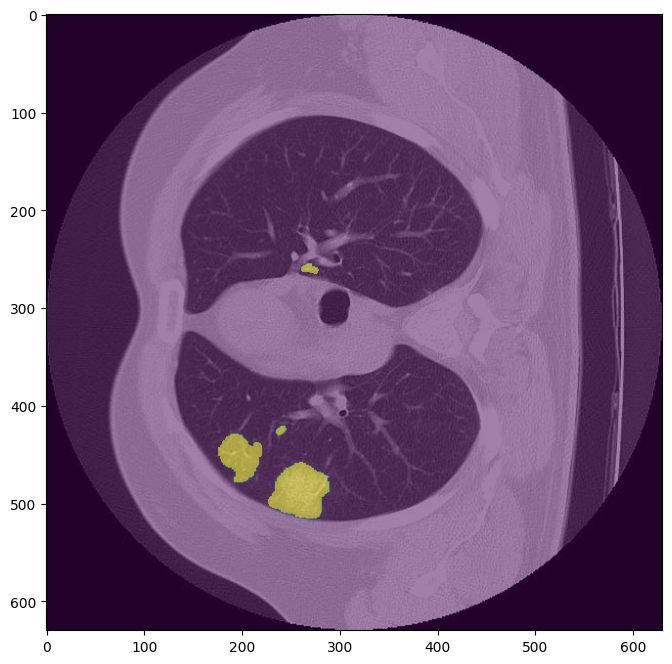

In [56]:
fig = plt.figure(figsize=(10,8))
plt.imshow(ct_sample[..., 25], cmap="gray")
plt.imshow(ct_sample_mask[..., 25], cmap="viridis", alpha=0.5)
#plt.imshow(ct_sample_lung_mask[..., 0], cmap="jet", alpha=0.5)